In [1]:
# Data Analysis Functionz
import pandas as pd
import numpy as np

# Imports for visualizing Data 
import matplotlib.pyplot as plt
import seaborn as sns

# Using Scikit-learn for machine learning 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Statistical Analytics Functions 
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as smampi


# Uploading The Data


In [2]:
#inital upload of data 
data = pd.read_csv("/kaggle/input/music-genres/high_popularity_spotify_data.csv")

print(data)

      energy    tempo  danceability playlist_genre  loudness  liveness  \
0      0.592  157.969         0.521            pop    -7.777    0.1220   
1      0.507  104.978         0.747            pop   -10.171    0.1170   
2      0.808  108.548         0.554            pop    -4.169    0.1590   
3      0.910  112.966         0.670            pop    -4.070    0.3040   
4      0.783  149.027         0.777            pop    -4.477    0.3550   
...      ...      ...           ...            ...       ...       ...   
1681   0.422  124.357         0.573          latin    -7.621    0.1020   
1682   0.725  105.016         0.711          latin    -8.315    0.1100   
1683   0.809   99.005         0.724          latin    -5.022    0.0765   
1684   0.642   83.389         0.463          latin    -4.474    0.0686   
1685   0.890  126.881         0.645            pop    -4.985    0.3760   

      valence               track_artist  time_signature  speechiness  ...  \
0       0.535      Lady Gaga, Bru

In [3]:
#raw dataset 
data.describe()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.667216,121.070938,0.650362,-6.704131,0.171579,0.525737,3.950178,0.100926,75.806050,0.041520,0.578292,5.338078,214562.125741,0.221220
std,0.184908,27.066029,0.157721,3.377068,0.123953,0.236113,0.326673,0.099748,6.032532,0.156556,0.493979,3.608208,58310.747929,0.250593
min,0.001610,49.305000,0.136000,-43.643000,0.021000,0.034800,1.000000,0.023200,68.000000,0.000000,0.000000,0.000000,61673.000000,0.000013
25%,0.551000,100.058750,0.543250,-7.950250,0.093400,0.339000,4.000000,0.037900,71.000000,0.000000,0.000000,2.000000,176607.750000,0.023050
50%,0.689000,120.001000,0.664500,-5.974500,0.121000,0.528000,4.000000,0.058100,75.000000,0.000006,1.000000,5.000000,211180.000000,0.124000
75%,0.807000,136.833500,0.769000,-4.687250,0.210000,0.720000,4.000000,0.118000,79.000000,0.000814,1.000000,8.000000,244993.250000,0.334750
max,0.990000,209.688000,0.979000,1.295000,0.950000,0.978000,5.000000,0.848000,100.000000,0.971000,1.000000,11.000000,547107.000000,0.995000


# Data Cleaning

In [4]:
# Dropping, and Isolating only important collumns 
columns_to_drop = ['liveness','time_signature', 'speechiness', 'track_popularity', 'instrumentalness', 
                  'mode', 'key', 'duration_ms','track_artist', 'track_href', 'uri', 'track_album_name', 
                  'analysis_url','track_id', 'track_album_release_date', 'track_album_id', 'id', 
                  'playlist_subgenre', 'type','playlist_id','playlist_name']

In [5]:
#top of the data
data.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [6]:
# last few rows and columns
data.tail()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,...,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.551,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,...,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.424,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,...,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.182,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,...,0.000000,6tE9Dnp2zInFij4jKssysL,1,1,189893,0.314,59nOXPmaKlBfGMDeOVGrIK,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1685,0.890,126.881,0.645,pop,-4.985,0.3760,0.421,"Alan Walker, Ina Wroldsen",4,0.1280,...,0.000009,34yBJhr8zlBAHMEMSwrISN,1,6,205087,0.259,2GE3k8I0Sbh0puCjI15KGy,scandi,audio_features,59z06GgF6TTDbm5cr1RZUC


# Training the Data

In [7]:
# isolate features for both axis
X = data[['loudness', 'energy', 'tempo', 'valence', 'acousticness']]
y = data['danceability']

In [8]:
# splitting the data 80/20
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Create and train the linnear regression model 
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [10]:
# Produce predictions from the Y axis of the model 

#here
y_prediction = model.predict(test_x)

In [11]:
# Model Evaluation - using both data for metrics


r2_metric = r2_score(test_y, y_prediction)
RMSE_metric = np.sqrt(mean_squared_error(test_y, y_prediction))

print(f"R2 Score: {r2_metric:.3f}")
print(f"RMSE Metric: {RMSE_metric:.3f}")

R2 Score: 0.260
RMSE Metric: 0.138


In [12]:
#display the coefficients
NameFeatures= X.columns
coefficients= model.coef_
intercept  = model.intercept_

print(f"Intercept: {intercept:.3f}")
for varname, coef in zip(NameFeatures, coefficients):
    print(f"{varname}: {coef:.4f}")

Intercept: 0.974
loudness: 0.0158
energy: -0.3761
tempo: -0.0006
valence: 0.2534
acousticness: -0.1237


# Visualizing Data Accuracy

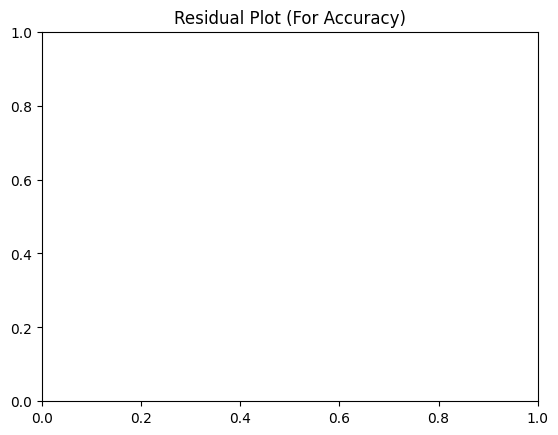

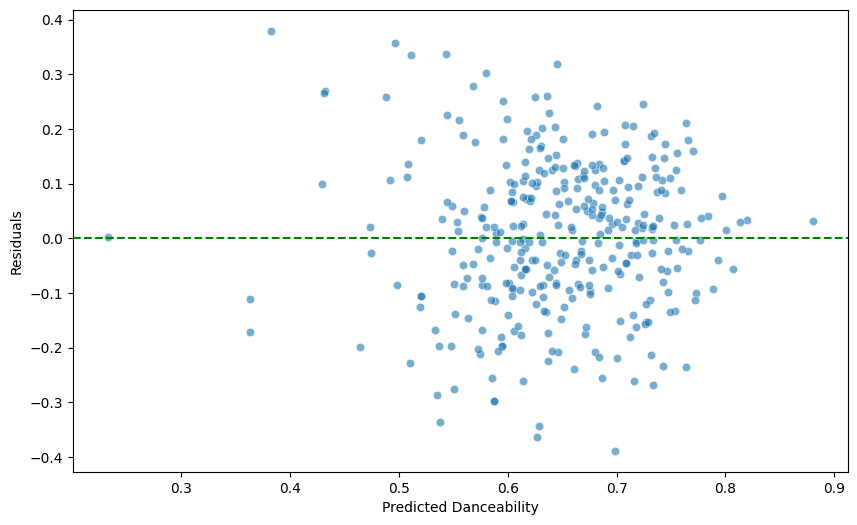

In [13]:
# Residual plot to check model assumptions
residuals = test_y - y_prediction
plt.title('Residual Plot (For Accuracy)')
plt.figure(figsize=(10, 6))
plt.ylabel('Residuals')
sns.scatterplot(x=y_prediction, y=residuals, alpha=0.6)
plt.xlabel('Predicted Danceability')
plt.axhline(y=0.0, color='green', linestyle='--')
plt.show()

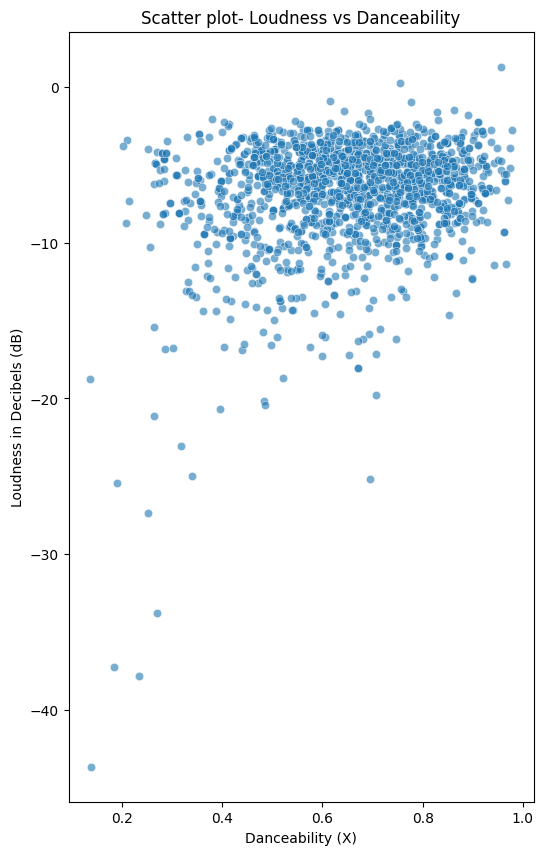

In [14]:
#Scatter plot that checks loudness versus danceability
plt.figure(figsize=(6, 10))
plt.title('Scatter plot- Loudness vs Danceability')
plt.xlabel('Danceability (X)')
plt.ylabel('Loudness in Decibels (dB)')
sns.scatterplot(x=data['danceability'], y=data['loudness'], alpha=0.6)
plt.ylabel('Loudness in Decibels (dB)')
plt.show()

# Visualizing Data : Loudness Vs Danceability & other stuff 

In [15]:
# TOP 10 MOST DANCEABLE SONGS BY GENRE

most_danceable_tracks = data.loc[
    data.groupby("playlist_genre")["danceability"].idxmax()
][["track_name", "danceability", "energy", "playlist_genre", "loudness"]]

most_danceable_tracks = most_danceable_tracks.sort_values("danceability", ascending=False)

print("TOP 10 MOST DANCEABLE SONGS BY GENRE:")
print("=" * 60)
for _, record in most_danceable_tracks.head(10).iterrows():
    print(f"{record['playlist_genre'].upper():<12} | {record['track_name'][:40]:<40} | Dance: {record['danceability']:.3f}")

TOP 10 MOST DANCEABLE SONGS BY GENRE:
POP          | Ice Ice Baby                             | Dance: 0.979
HIP-HOP      | NISSAN ALTIMA                            | Dance: 0.974
ARABIC       | Baby (Lil Baby feat. DaBaby)             | Dance: 0.970
BRAZILIAN    | Se Voce Nao Quer Passa a Vez             | Dance: 0.956
ELECTRONIC   | Around the World                         | Dance: 0.956
GAMING       | Lovin On Me                              | Dance: 0.943
LATIN        | Que Se Cuide                             | Dance: 0.937
ROCK         | Another One Bites The Dust - Remastered  | Dance: 0.932
REGGAE       | Buffalo Soldier                          | Dance: 0.929
AMBIENT      | Sprinter                                 | Dance: 0.918
